In [21]:
from subprocess import check_output
print(check_output(['ls', '../input']).decode('utf-8'))
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

fashion
fashionmnist



In [22]:
train_df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv', sep = ',')
test_df = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv', sep = ',')

In [23]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
train_data = np.array(train_df, dtype='float32')

In [26]:
test_data = np.array(test_df, dtype='float32')

In [27]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test = test_data[:,1:]/255
y_test = test_data[:,0]

# image data in x_train and x_test is from 0 to 255, we need to rescale this from 0 to 1.
# to do this we need to divide the x_train and x_test by 55.
# It's important that the training set and the testing set be preprocessed in the same way.

In [28]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

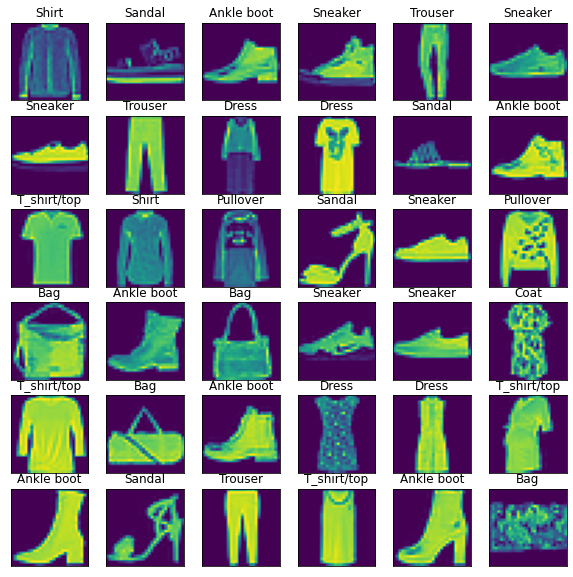

In [29]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

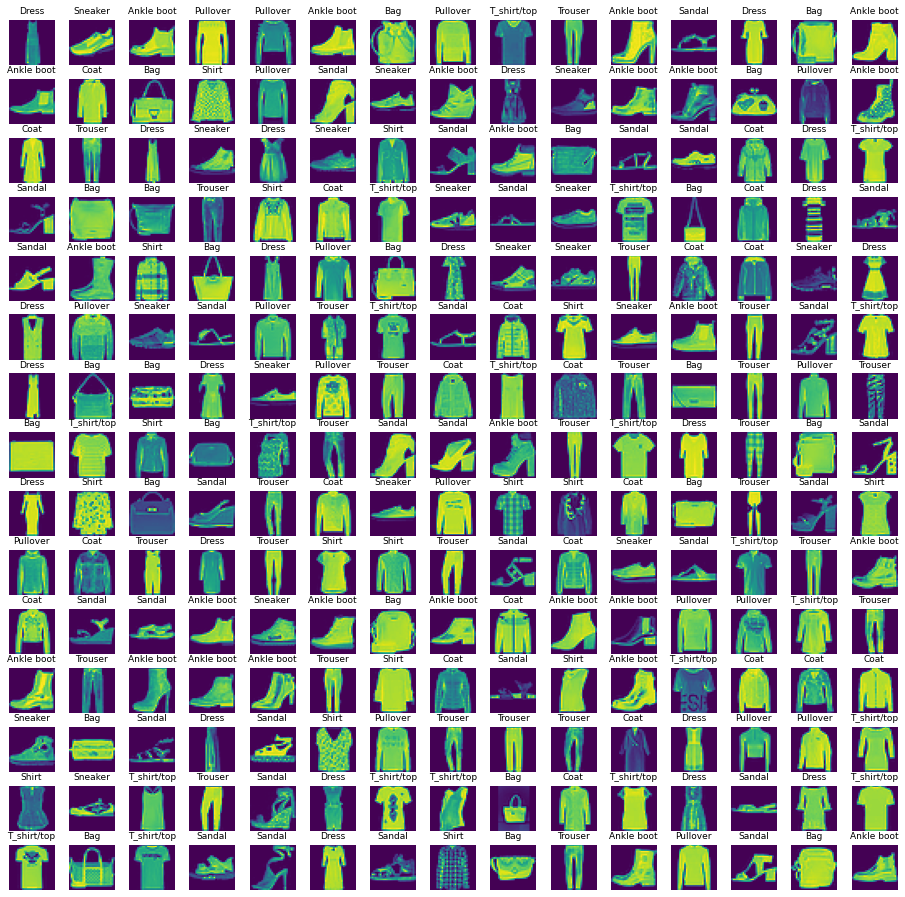

In [30]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (16, 16))
axes = axes.ravel() # flatten the 15 *15 matrix into 225 array
n_train = len(train_data)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(train_data[index,1:].reshape((28,28)))
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.3)

In [31]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1)

In [32]:
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

In [33]:
cnn_model = Sequential([
    Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = image_shape),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [36]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [37]:
history = cnn_model.fit(x_train, y_train, batch_size = 4096, epochs = 75, verbose = 1, validation_data = (x_validate, y_validate))

Epoch 1/75
12/12 [==============================] - 14s 1s/step - loss: 2.0069 - accuracy: 0.3422 - val_loss: 1.1305 - val_accuracy: 0.6507
Epoch 2/75
12/12 [==============================] - 13s 1s/step - loss: 0.9794 - accuracy: 0.7065 - val_loss: 0.6949 - val_accuracy: 0.7609
Epoch 3/75
12/12 [==============================] - 13s 1s/step - loss: 0.6721 - accuracy: 0.7636 - val_loss: 0.5824 - val_accuracy: 0.7925
Epoch 4/75
12/12 [==============================] - 13s 1s/step - loss: 0.5721 - accuracy: 0.7976 - val_loss: 0.5200 - val_accuracy: 0.8212
Epoch 5/75
12/12 [==============================] - 13s 1s/step - loss: 0.5142 - accuracy: 0.8241 - val_loss: 0.4841 - val_accuracy: 0.8309
Epoch 6/75
12/12 [==============================] - 13s 1s/step - loss: 0.4788 - accuracy: 0.8359 - val_loss: 0.4532 - val_accuracy: 0.8458
Epoch 7/75
12/12 [==============================] - 13s 1s/step - loss: 0.4542 - accuracy: 0.8426 - val_loss: 0.4294 - val_accuracy: 0.8534
Epoch 8/75
12/12 [==

Text(0.5, 1.0, 'Train - Accuracy')

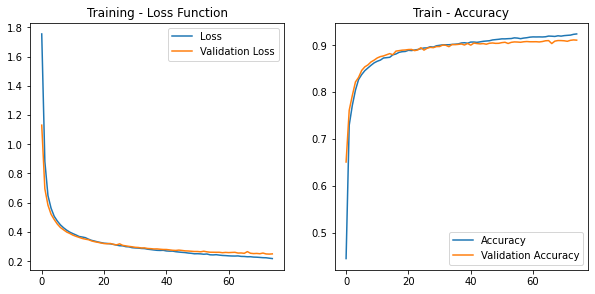

In [43]:
plt.figure(figsize = (10, 10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [44]:
score = cnn_model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2437
Test Accuracy : 0.9144


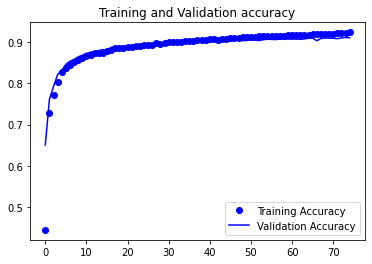

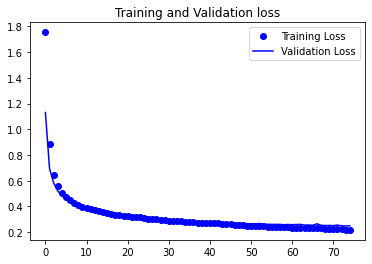

In [47]:
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [58]:
predicted_classes = cnn_model.predict_classes(x_test)
y_true = np.asarray(test_df.iloc[:, 0])
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.89      0.84      0.86      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.84      0.91      0.88      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.78      0.75      0.76      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



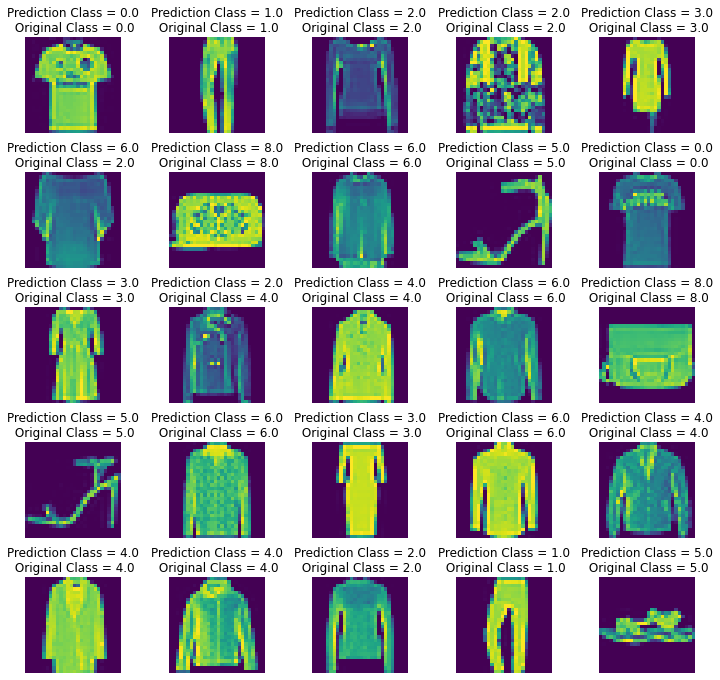

In [63]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)